In [1]:
import matplotlib.pyplot as plt
import numpy as np


def sigma_brs (t, tau, T, a,b,c):
    u = (a**2/(T - tau + b) - 2*a*c*np.log(T - tau + b) + c**2*tau) 
    l = (a**2/(T - t + b) - 2*a*c*np.log(T - t + b) + c**2*t) 
    var = (u-l)/(tau-t)
    return(np.sqrt(var))

def integral_brs(s,T, a, b,c):
    return(a**2/(T - s + b) - 2*a*c*np.log(T - s + b) + c**2*s)

def sigma_factor1(t, tau ,T, a, b):
    u = (a**2/(T - tau + b))
    l = (a**2/(T - t + b))
    var = (u-l)/(tau-t)
    return(np.sqrt(var))

def sigma_factor2(t, tau,T, a, b,c):
    u = (- 2*a*c*np.log(T - tau + b))
    l = (- 2*a*c*np.log(T - t + b))
    var = (u-l)/(tau-t)
    return(np.sqrt(var))


def sigma_factor3(t, tau,T,c):
    u = (c**2*tau)
    l = (c**2*t)
    var = (u-l)/(tau-t)
    return(np.sqrt(var))


def volatility(t, tau, T, a,  b, c):
    upper_integral = integral_brs(tau, T, a,b,c ) 
    lower_integral = integral_brs(t, T, a,b,c ) 
    variance =  (upper_integral - lower_integral)/(tau-t)
    return np.sqrt(variance)



In [2]:

t = 0
T = 1 
tau =1/12
a= 0.9
b = 0.6
c= 0.1
    
vol = volatility(t, tau, T, a,b,c)
vol2 = sigma_brs(t, tau, T, a,b,c)

print("volatility:"+ str(vol))
print("volatility2:"+ str(vol2))
print("Variance:"+ str(vol**2))
print("Variance2:"+ str(vol2**2))


f1 = sigma_factor1(t, tau, T, a,b)
f2 = sigma_factor2(t, tau, T, a,b,c)
f3 = sigma_factor3(t, tau, T, c)

print("SumVariance:"+ str((f1**2+f2**2+f3**2)))


volatility:0.6777365035803672
volatility2:0.6777365035803672
Variance:0.4593267682853411
Variance2:0.4593267682853411
SumVariance:0.45932676828534064


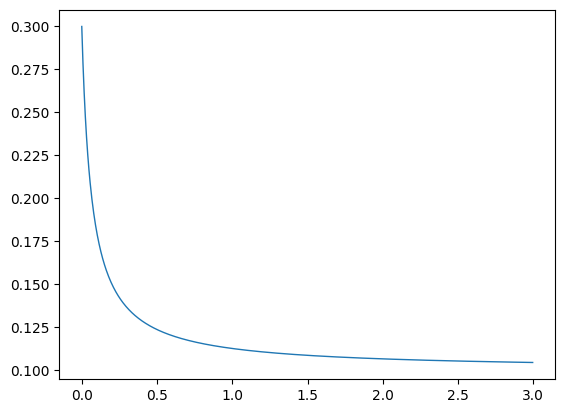

In [9]:

def term_structure(t):
    T_max= t[-1]
    # Define a term structure function that could depend on t
    # Simple sinusoidal term structure for demonstration
    return 100 + 20 * np.cos(2*T_max * np.pi * t /T_max) + np.exp(0.5*t)

def vol_structure(t, T, a= 0.9, b = 0.6, c= 0.1):
    return a / (t + b) + c

# Parameters 
T = 3  # Total time in years
dt = 1/252  # Daily time step
n_steps = int(T / dt)

b = 2/3/10
a = 0.2*b
c = 0.1

taus = np.arange(0, n_steps) * dt  # Time steps

#plt.plot(taus, term_structure(taus), lw=1, label='Term Structure')
plt.plot(taus, vol_structure(taus, T, a, b, c), lw=1, label='Volatility Structure')
#plt.plot(taus, sigma_brs(t, t+dt, taus, a,b,c), lw=1, label='Volatility Structure')

## Simulation

### One factor

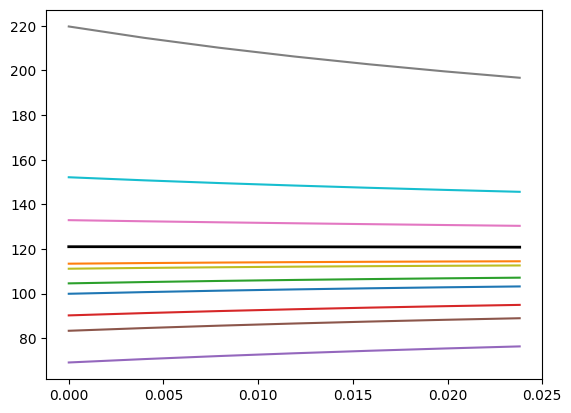

In [12]:
# Parameters 

n_sims = 10  # Number of paths to simulate
T = 7/252  # Total time in years
dt = 1/252  # Daily time step
n_steps = int(T / dt)

taus = np.arange(0, n_steps) * dt  # Time steps
# Generate independent random samples
w = np.random.randn(n_sims, 1)

initial_term_structure = term_structure(taus)

#sigma = 0.3

sigma = sigma_brs(t, t+dt, taus, a,b,c) # Term structure of volatility
z = np.exp(sigma * w - 0.5 * sigma**2*dt) 

sim_curves = z *  term_structure(taus+dt) # Change this so term structure starts at t+dt

# Plot each row as a separate line
for i, row in enumerate(sim_curves):
    plt.plot(taus,row, label=f'Row {i+1}')
    
plt.plot(taus, term_structure(taus), color='black', lw=2, label='Term Structure')
#plt.plot(taus,sigma_brs(t, t+dt, taus, a,b,c), color='black', lw=2, label='Term Structure')



## Check simulation consistency

In [8]:
z

array([[1.12125036, 1.11627012, 1.11185287, ..., 1.03981957, 1.03981737,
        1.03981517],
       [1.38817216, 1.37055676, 1.35505632, ..., 1.11832042, 1.11831362,
        1.11830685],
       [0.97687509, 0.97777271, 0.97857235, ..., 0.99209909, 0.99209952,
        0.99209995],
       ...,
       [0.88207   , 0.88639883, 0.8902715 , ..., 0.95817379, 0.95817602,
        0.95817823],
       [1.21397625, 1.20484877, 1.19677718, ..., 1.0683634 , 1.06835957,
        1.06835574],
       [0.74746935, 0.75599859, 0.76367616, ..., 0.90559862, 0.9056035 ,
        0.90560836]])